In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_excel("Datasets/Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.shape

(10683, 11)

In [6]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
data.isna().sum()    # data.isnull()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data[data["Route"].isna() | data["Total_Stops"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
# Convert Date_of_Journey, Dep_Time, and Arrival_Time columns to datetime objects
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y")

# Extract Year, Month, Day from Date_of_Journey
data["Year"] = data["Date_of_Journey"].dt.year
data["Month"] = data["Date_of_Journey"].dt.month
data["Day"] = data["Date_of_Journey"].dt.day

In [16]:
# Convert Dep_Time to datetime object
data["Dep_Time"] = pd.to_datetime(data["Dep_Time"])

# Extract Hour and Minute from Dep_Time
data["Hour"] = data["Dep_Time"].dt.hour
data["Minute"] = data["Dep_Time"].dt.minute

# Use Year, Month, Day, Hour, and Minute to construct Dep_Time column
data["Dep_Time"] = pd.to_datetime(data[["Year", "Month", "Day", "Hour", "Minute"]])

# Drop the intermediate columns
data.drop(columns=["Year", "Month", "Day", "Hour", "Minute"], inplace=True)

In [17]:
# Regular expression to detect both formats in Arrival_Time column
format1 = r'(?P<Hour>\d{2}):(?P<Minute>\d{2}) (?P<Day>\d{2}) (?P<Month>\w{3})'
format2 = r'(?P<Hour>\d{2}):(?P<Minute>\d{2})'

# Function to handle different formats in Arrival_Time
def convert_arrival_time(row):
    if re.match(format1, row['Arrival_Time']):
        # Format like "01:10 22 Mar"
        match = re.match(format1, row['Arrival_Time'])
        day = int(match.group('Day'))
        month = match.group('Month')
        year = row['Date_of_Journey'].year
        return pd.to_datetime(f"{day} {month} {year} {match.group('Hour')}:{match.group('Minute')}", format="%d %b %Y %H:%M")
    elif re.match(format2, row['Arrival_Time']):
        # Format like "13:15"
        match = re.match(format2, row['Arrival_Time'])
        year = row['Date_of_Journey'].year
        month = row['Date_of_Journey'].month
        day = row['Date_of_Journey'].day
        return pd.to_datetime(f"{day}-{month}-{year} {match.group('Hour')}:{match.group('Minute')}", format="%d-%m-%Y %H:%M")
    else:
        return pd.NaT

# Apply the function to handle different formats in Arrival_Time
data["Arrival_Time"] = data.apply(convert_arrival_time, axis=1)

In [18]:
data[data["Arrival_Time"] < data["Date_of_Journey"]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-22 01:10:00,2h 50m,non-stop,No info,3897
21,Air India,2019-03-21,Banglore,New Delhi,BLR → COK → DEL,2019-03-21 22:00:00,2019-03-19 13:20:00,15h 20m,1 stop,No info,6955
110,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,2019-03-18 14:05:00,2019-03-16 05:05:00,15h,1 stop,No info,13555
379,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,2019-03-18 16:55:00,2019-03-16 09:00:00,16h 5m,1 stop,In-flight meal not included,11087
605,Air India,2019-03-21,Banglore,New Delhi,BLR → COK → DEL,2019-03-21 22:00:00,2019-03-19 10:50:00,12h 50m,1 stop,No info,6955
...,...,...,...,...,...,...,...,...,...,...,...
10441,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,2019-03-18 11:40:00,2019-03-16 08:15:00,20h 35m,1 stop,No info,12284
10489,IndiGo,2019-03-15,Chennai,Kolkata,MAA → CCU,2019-03-15 22:05:00,2019-03-13 00:30:00,2h 25m,non-stop,No info,6297
10590,Air Asia,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 23:25:00,2019-03-22 02:10:00,2h 45m,non-stop,No info,3383
10638,Jet Airways,2019-03-21,Banglore,New Delhi,BLR → BOM → DEL,2019-03-21 21:25:00,2019-03-19 11:25:00,14h,1 stop,In-flight meal not included,7832


In [19]:
# Find the index of records where Arrival_Time is earlier than Date_of_Journey
index_earlier_arrival = data[data["Arrival_Time"] < data["Date_of_Journey"]].index

# Drop the records using the index
data.drop(index_earlier_arrival, inplace=True)

# Reset the DataFrame index after dropping rows
data.reset_index(drop=True, inplace=True)

In [20]:
data[data["Arrival_Time"] < data["Date_of_Journey"]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


# Exploratory Data Analysis & Feature Engineering:

## 1. Duration 

## 2. Departure and Arrival time

## 3. Date of journey

## 4. Total stops

## 5. Additional info

## 6. Airline

## 7. Source and destination

## 8. Route

## DURATION

In [21]:
def convert_duration_to_minutes(duration_str):
    hours = re.findall(r'\d+h', duration_str)
    minutes = re.findall(r'\d+m', duration_str)

    total_minutes = 0
    if hours:
        total_minutes += int(hours[0].replace("h", "")) * 60
    if minutes:
        total_minutes += int(minutes[0].replace("m", ""))
    
    return total_minutes

In [22]:
data['Duration'] = data['Duration'].apply(convert_duration_to_minutes)
data['Duration'] = data['Duration'].astype(int)

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,445,2 stops,No info,7662
1,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,1140,2 stops,No info,13882
2,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,325,1 stop,No info,6218
3,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,285,1 stop,No info,13302
4,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2019-06-24 09:00:00,2019-06-24 11:25:00,145,non-stop,No info,3873


In [24]:
# Calculate the difference between Arrival_Time and Dep_Time in minutes and convert to integer
data["Time_Difference"] = ((data["Arrival_Time"] - data["Dep_Time"]).dt.total_seconds() / 60).astype(int)

In [25]:
data[data["Time_Difference"] != data["Duration"]].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time_Difference
50,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-28 01:10:00,170,non-stop,No info,4377,4490
69,Jet Airways,2019-03-09,Banglore,New Delhi,BLR → BOM → DEL,2019-03-09 05:45:00,2019-03-13 08:15:00,1590,1 stop,In-flight meal not included,9134,5910
851,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 21:20:00,2019-03-28 00:15:00,175,non-stop,No info,5694,4495
985,Air India,2019-03-03,Banglore,New Delhi,BLR → CCU → GAU → DEL,2019-03-03 11:05:00,2019-03-07 22:10:00,2105,2 stops,No info,11791,6425
1015,Air Asia,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 23:25:00,2019-03-28 02:10:00,165,non-stop,No info,4482,4485


In [26]:
# Find the index of records where Time_Difference does not match Duration
index_mismatch_duration = data[data["Time_Difference"] != data["Duration"]].index

# Drop the records using the index
data.drop(index_mismatch_duration, inplace=True)

# Reset the DataFrame index after dropping rows
data.reset_index(drop=True, inplace=True)

In [27]:
data[data["Time_Difference"] != data["Duration"]].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time_Difference


In [28]:
# Drop the Time_Difference column
data.drop(columns=["Time_Difference"], inplace=True)

## DEPARTURE AND ARRIVAL TIME

In [29]:
data["Dep_Time_in_hours"] = data["Dep_Time"].dt.hour
data["Dep_Time_in_minutes"] = data["Dep_Time"].dt.minute
data["Arrival_Time_in_hours"] = data["Arrival_Time"].dt.hour
data["Arrival_Time_in_minutes"] = data["Arrival_Time"].dt.minute
data["Arrival_Time_in_days"] = data["Arrival_Time"].dt.day
data["Arrival_Time_in_months"] = data["Arrival_Time"].dt.month

In [30]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Arrival_Time_in_days,Arrival_Time_in_months
0,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,445,2 stops,No info,7662,5,50,13,15,1,5
1,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25,10,6
2,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,325,1 stop,No info,6218,18,5,23,30,12,5
3,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,285,1 stop,No info,13302,16,50,21,35,1,3
4,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2019-06-24 09:00:00,2019-06-24 11:25:00,145,non-stop,No info,3873,9,0,11,25,24,6


In [31]:
data.drop(["Dep_Time","Arrival_Time"], axis=1, inplace=True)

In [32]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Arrival_Time_in_days,Arrival_Time_in_months
0,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
1,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,10,6
2,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
3,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3
4,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873,9,0,11,25,24,6


## DATE OF JOURNEY

In [33]:
data["Date_of_Journey"].dt.year.unique()

array([2019], dtype=int64)

In [34]:
data["Day"] = data["Date_of_Journey"].dt.day
data["Month"] = data["Date_of_Journey"].dt.month

In [35]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Arrival_Time_in_days,Arrival_Time_in_months,Day,Month
0,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5,1,5
1,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,10,6,9,6
2,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5,12,5
3,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3,1,3
4,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873,9,0,11,25,24,6,24,6


In [36]:
data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [37]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Arrival_Time_in_days,Arrival_Time_in_months,Day,Month
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5,1,5
1,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,10,6,9,6
2,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5,12,5
3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3,1,3
4,SpiceJet,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873,9,0,11,25,24,6,24,6


## TOTAL STOPS

In [38]:
data["Total_Stops"].value_counts()

1 stop      5527
non-stop    3470
2 stops     1496
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# Use regex to extract Total_Stops information
data.loc[data["Total_Stops"] != "non-stop", "Total_Stops"] = data["Total_Stops"].str.replace(r'[^0-9]', '', regex=True)

# Replace "non-stop" with 0
data.loc[data["Total_Stops"] == "non-stop", "Total_Stops"] = "0"

# Convert Total_Stops to integer data type
data["Total_Stops"] = data["Total_Stops"].astype(int)

In [40]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Arrival_Time_in_days,Arrival_Time_in_months,Day,Month
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5,1,5
1,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,10,6,9,6
2,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5,12,5
3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3,1,3
4,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,No info,3873,9,0,11,25,24,6,24,6


## ADDITIONAL INFO

In [41]:
data["Additional_Info"].value_counts()

No info                         8252
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [42]:
data.drop(["Additional_Info"], axis=1, inplace=True)

In [43]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Arrival_Time_in_days,Arrival_Time_in_months,Day,Month
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,1,5
1,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,10,6,9,6
2,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,12,5
3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,1,3
4,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,3873,9,0,11,25,24,6,24,6


In [44]:
data.select_dtypes(["object"]).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

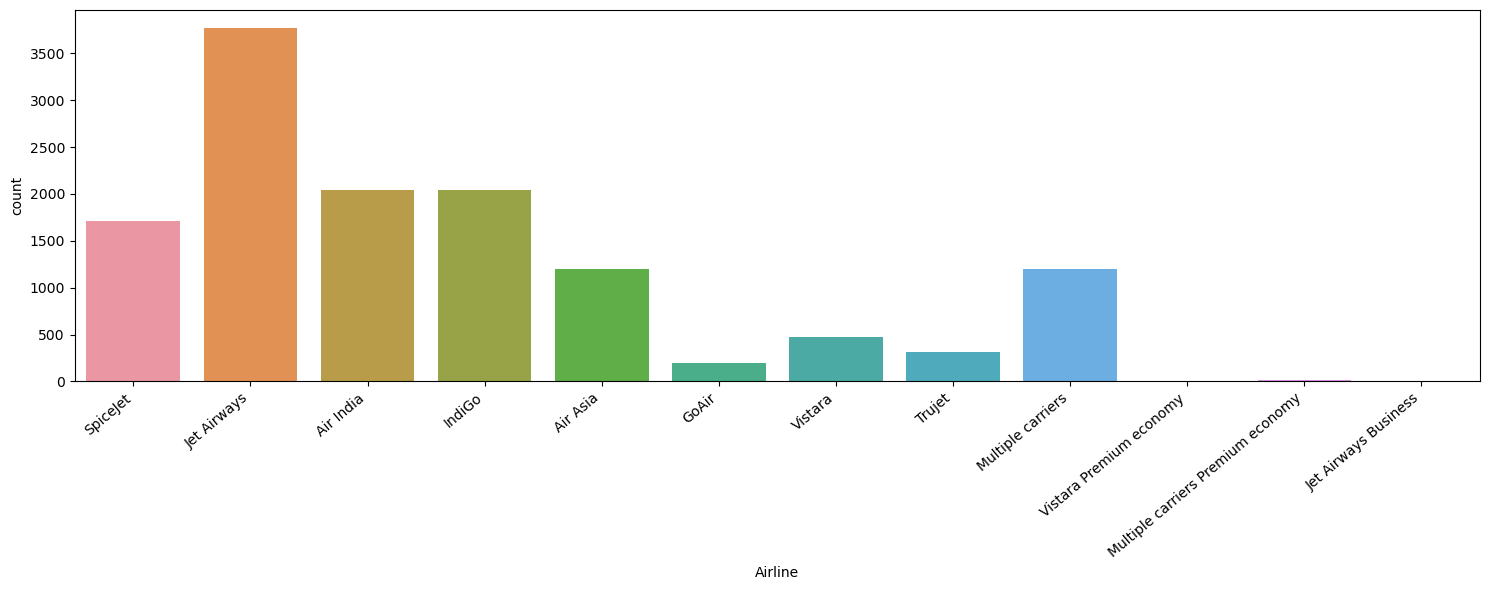

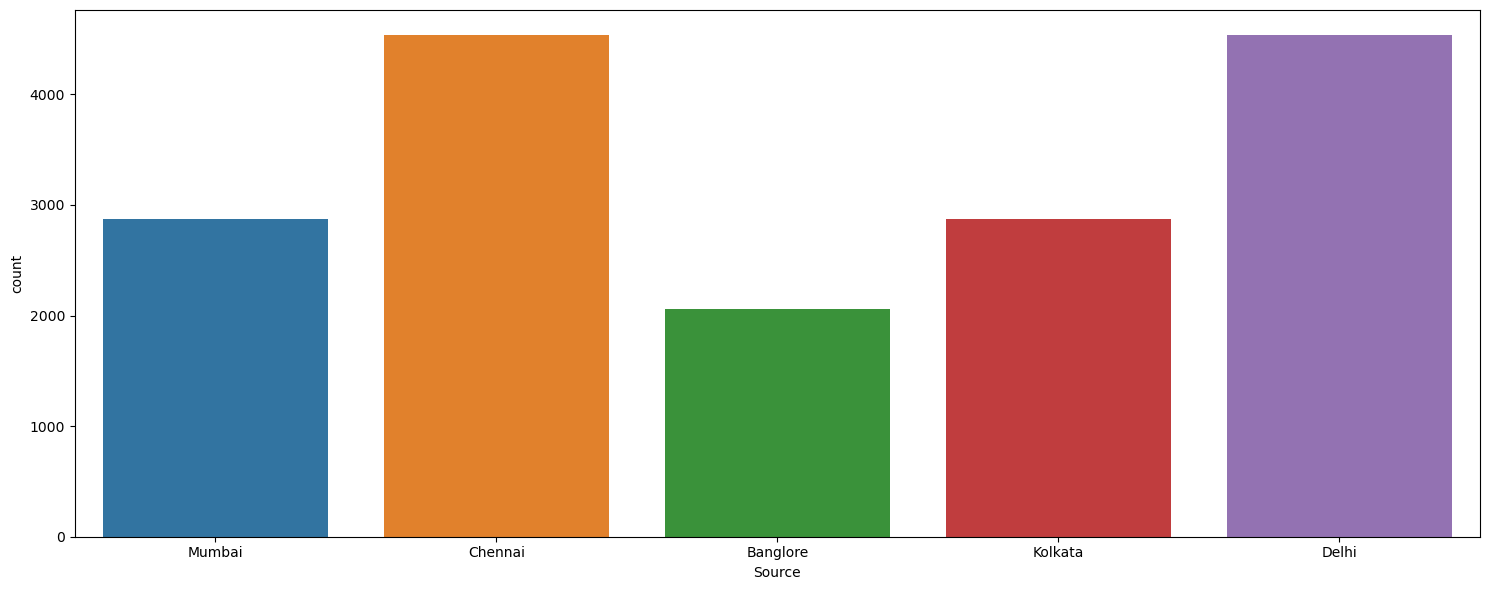

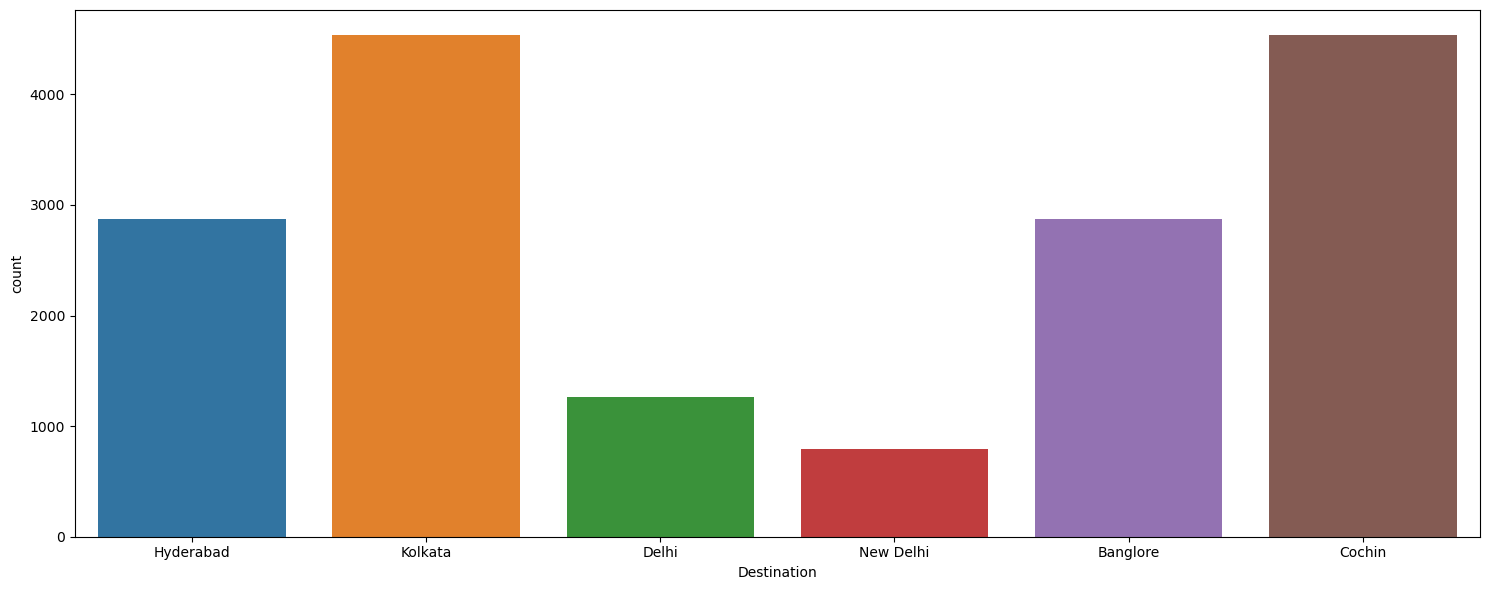

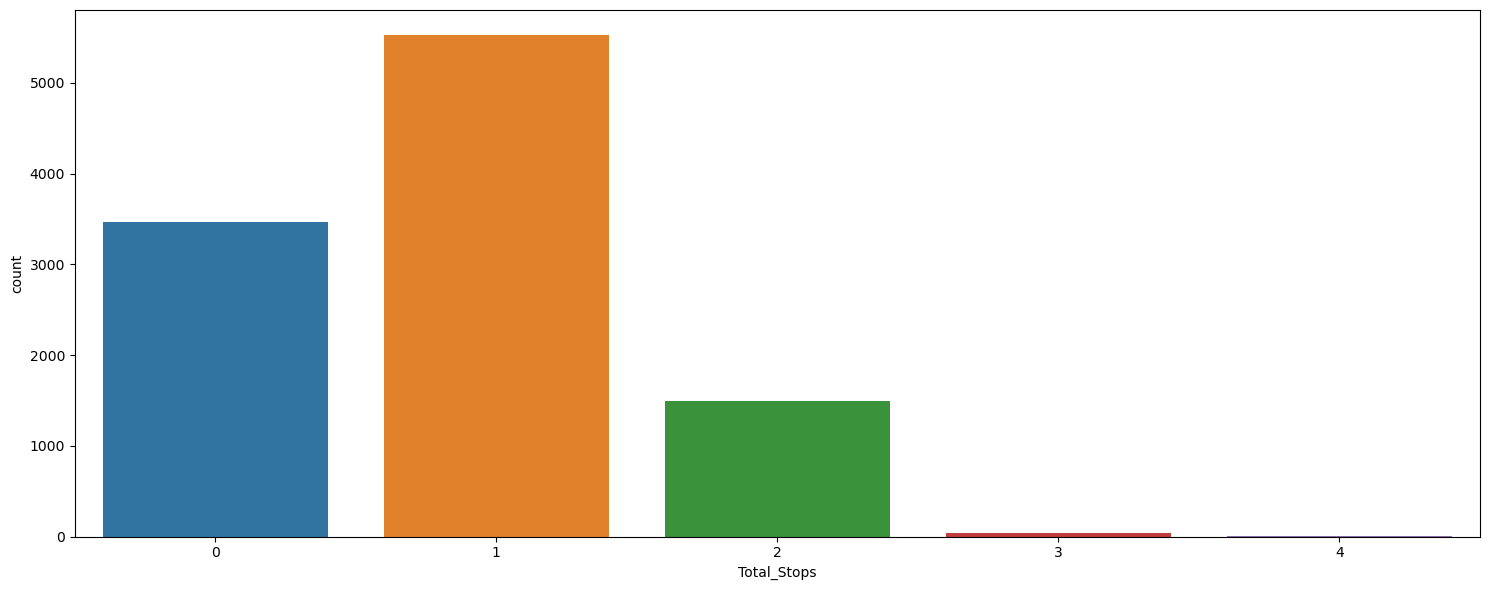

In [45]:
for i in ["Airline", "Source", "Destination", "Total_Stops"]:
    plt.figure(figsize = (15,6))
    sns.countplot(data=data, x=i)
    ax = sns.countplot(x=i, data=data.sort_values("Price", ascending=True))
    if i == "Airline":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n\n")